## Cluster Analysis of Solar Projects in NY without large-scale industrial installations

###### This script contains the following: 
#### 1. Importing libraries and data
#### 2. Pre-processing data
##### 2.1 Removing categorical columns
##### 2.2 Standardise data
##### 2.3 Principal component analysis
#### 3. The elbow technique
#### 4. K-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\ii\OneDrive\02052023Solar Programs NY\02. Prepared data'

In [4]:
df = pd.read_pickle(os.path.join(path,'solar_no_outliers.pkl'))

In [5]:
df.shape

(70970, 22)

In [6]:
df.head()

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data,installation_size
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,NYS Electric and Gas,Lease,...,2.0,40.0,41800.00,6930.0,10.00,11738.0,False,False,"Maine, NY 13802\n(42.240938, -76.047937)",Small Solar
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PSEG Long Island,Lease,...,1.0,28.0,30940.00,2520.0,7.00,8217.0,False,False,"Levittown, NY 11756\n(40.725845, -73.517198)",Small Solar
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,National Grid,Lease,...,2.0,49.0,48387.50,11025.0,12.25,14380.0,False,False,"Cortland, NY 13045\n(42.588691, -76.185061)",Small Solar
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,...,1.0,15.0,23509.54,2943.0,4.91,5758.0,False,False,"Staten Island, NY 10314\n(40.604049, -74.152798)",Small Solar
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,Orange and Rockland Utilities,Lease,...,1.0,22.0,25283.00,5720.0,5.72,6714.0,False,False,"Warwick, NY 10990\n(41.263165, -74.365461)",Small Solar


In [7]:
df.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size'],
      dtype='object')

### 2. Pre-processing data

#### 2.1 Removing categorical columns

In [8]:
#need to remove categorical data columns
df1=df.drop(columns=['index','project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'affordable_solar', 'community_distributed_generation', 'location_data','installation_size']) 

In [9]:
df1.head()

,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year
0,2.0,40.0,41800.00,6930.0,10.00,11738.0
1,1.0,28.0,30940.00,2520.0,7.00,8217.0
2,2.0,49.0,48387.50,11025.0,12.25,14380.0
3,1.0,15.0,23509.54,2943.0,4.91,5758.0
4,1.0,22.0,25283.00,5720.0,5.72,6714.0


### 3. The elbow technique

Although we could use the resulting dataframe from the component analysis as input for the cluster analysis, here I chose to continue with the six variables, to gain some information on how they vary

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-18563661096409.547,
 -7901706349847.39,
 -5006252057794.759,
 -3777885698881.151,
 -2996271996683.681,
 -2375689270677.434,
 -2041406466664.919,
 -1821376323172.309,
 -1647464696450.626]

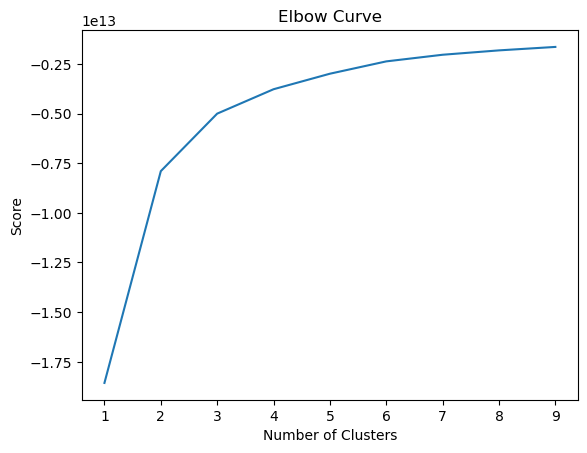

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

With the elbow curve in this dataset we see we can create 3 clusters with some variance

### 4. K-means clustering

Two clusters is maybe not sufficiently informative to understand the variety of the data, which means k-clustering may not be the best method for this dataset, but the two clusters still show significant differences

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [15]:
df1['clusters'] = kmeans.fit_predict(df1)

In [16]:
df1.head()

,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,clusters
0,2.0,40.0,41800.00,6930.0,10.00,11738.0,2
1,1.0,28.0,30940.00,2520.0,7.00,8217.0,2
2,2.0,49.0,48387.50,11025.0,12.25,14380.0,0
3,1.0,15.0,23509.54,2943.0,4.91,5758.0,1
4,1.0,22.0,25283.00,5720.0,5.72,6714.0,1


In [17]:
df1['clusters'].value_counts()

1    32826
2    28276
0     9868
Name: clusters, dtype: int64

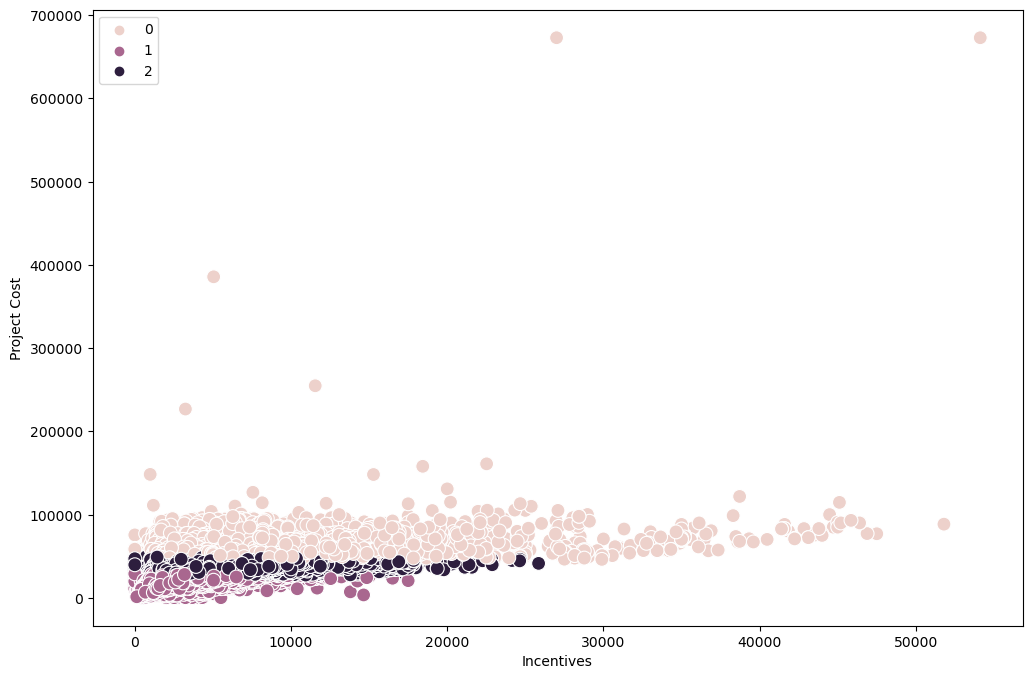

In [18]:
# Plot the clusters for the "incentive" and "project_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['incentive'], y=df1['project_cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Incentives') # Label x-axis.
plt.ylabel('Project Cost') # Label y-axis.
plt.show()

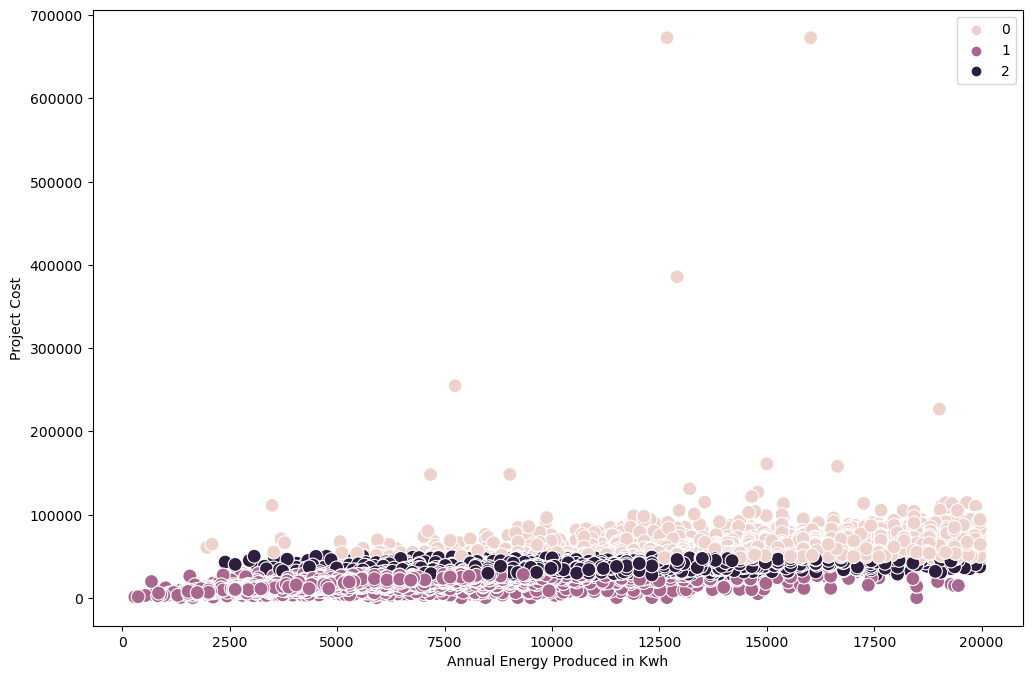

In [19]:
# Plot the clusters for project_cost  and kwh_year variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['kwh_year'], y=df1['project_cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Annual Energy Produced in Kwh') # Label x-axis.
plt.ylabel('Project Cost') # Label y-axis.
plt.show()

In [20]:
#using loc function to create a cluster column/category
df1.loc[df1['clusters'] == 0, 'cluster'] = 'orange'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'green'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'yellow'

In [21]:
# use group by to compare clusters for inverter_quantity, pv_quantity, project_cost, incentive, kw_dc, kwh_year
df1.groupby('cluster').agg({'inverter_quantity':['mean', 'median'], 
                         'pv_quantity':['mean', 'median'], 
                         'project_cost':['mean', 'median'],
                          'incentive':['mean', 'median'],
                          'kw_dc':['mean', 'median'],
                          'kwh_year':['mean', 'median']})

inverter_quantity        pv_quantity         project_cost           \
                     mean median        mean median          mean   median   
cluster                                                                      
green            7.120727    1.0   19.001127   18.0  20425.776829  21060.0   
orange           9.627584    2.0   43.828638   42.0  59925.054907  56701.0   
yellow           9.256330    1.0   30.512873   30.0  37063.148204  36400.0   

           incentive                kw_dc             kwh_year           
                mean    median       mean median          mean   median  
cluster                                                                  
green    2691.878278  2196.000   5.134811   5.00   6026.489155   5869.0  
orange   7583.533992  5671.070  11.937924  11.70  14012.384678  13734.0  
yellow   4998.562542  3968.895   8.462289   8.18   9932.469692   9596.0

The clusters do not show very different values in the means, this implies they are not the best option for our dataset

Nevertheless, the clusters show their are roughly three groups within the residential installations, from very low costs and energy produced to a fairly high energy produced/cost.

In [22]:
df.to_excel(r'C:\Users\ii\OneDrive\02052023Solar Programs NY\02. Prepared data\export_solPro.xlsx', index=False)

In [24]:
df1.to_excel(r'C:\Users\ii\OneDrive\02052023Solar Programs NY\02. Prepared data\export_solclu.xlsx', index=False)